In [16]:
import torch 

# Side View 

In [17]:
pt_info = torch.load("/workspace/data/pt/run_3/osmo_2.pt")
print(pt_info.keys())
print(len(pt_info.keys()))

dict_keys(['optical_flow', 'depth', 'none_index', 'YOLO', 'detectron2', 'video_name', 'video_path', 'frame_count', 'img_shape', 'fps', 'duration', 'frames'])
12


In [18]:
print("optical_flow", pt_info["optical_flow"].shape)
print("depth", pt_info["depth"].shape)
print("non_indexed", pt_info["none_index"])
print("YOLO", pt_info["YOLO"].keys())
print("detectron2", pt_info["detectron2"].keys())
print("video_name", pt_info["video_name"])
print("video_path", pt_info["video_path"])
print("frame_count", pt_info["frame_count"])
print("img_shape", pt_info["img_shape"])
print("fps", pt_info["fps"])
print("duration", pt_info["duration"])
print("frames", pt_info["frames"].shape)

optical_flow torch.Size([359, 2, 1080, 1920])
depth torch.Size([360, 1, 1080, 1920])
non_indexed []
YOLO dict_keys(['bbox', 'mask', 'keypoints', 'keypoints_score'])
detectron2 dict_keys(['bbox', 'keypoints', 'keypoints_score'])
video_name osmo_2
video_path /workspace/data/side_raw/run_3/osmo_2.mp4
frame_count 360
img_shape (1080, 1920)
fps 29.0
duration 0.0
frames torch.Size([360, 1080, 1920, 3])


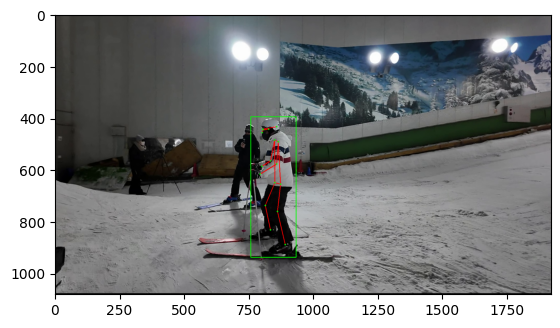

In [19]:
import matplotlib.pyplot as plt

plt.imshow(pt_info["frames"][-1].numpy())

In [20]:
import plotly.graph_objects as go
import numpy as np

# 生成随机点
np.random.seed(42)
x = np.random.randn(10)
y = np.random.randn(10)
z = np.random.randn(10)

# 创建3D散点图
fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=z,               # 可以用 z 映射颜色
        colorscale='Viridis', # 配色方案
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# 显示（在 notebook 中可交互）
fig.show()

# 可选：保存为 HTML
# fig.write_html("3d_plot.html")
